In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [11]:
df= pd.read_csv('competition_edu_dataset.csv')

### Now, we move onto analysing the data and preparing it to be fitted into our models.

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    object 
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ KB


### We can see here, that there appears to be no null value in the data. But the column 'Horsepower' seems to have dtype of 'object', which seems out of place.

In [12]:
df['Horsepower']= df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

### It seems out assumption of the dataset having no missing values was wrong, and in fact, it is present in the form of the object '?'. We will replace it with np.nan as it is easier to work with

In [13]:
df['Horsepower']= df['Horsepower'].str.strip().replace('?', np.nan).astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    294 non-null    float64
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 21.2+ KB


### As we can see now, the column has 6 missing data values. We will deal with this later on.

### Now we are only left with 1 catgorical column, which is 'Car Name'. Let us take a closer look into it

In [15]:
df['Car Name'].nunique()

244

### 244/300 ? The number of categories in this column seems too large to work with ! So we can either generalise the categories to just the Car company name or remove it all together.
### In this project, we will do both by building a model to deal with the Car company categories and other models that don't need to deal with any catgorical data altogether, and see which one works best

### We will make 2 datasets, df_cats and df_vals, the latter only containing only non categorical columns.

In [23]:
df_vals= df.drop(columns=['Car Name'])
df_cats= df.drop(columns=['Car Name'])
df_cats['Company']= df['Car Name'].str.split(expand=True)[0]

In [85]:
df_cats['Company'].nunique()

36

In [24]:
df_vals.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,13.0,8,400.0,190.0,4422,12.5,72,1
1,13.0,8,350.0,145.0,3988,13.0,73,1
2,15.5,8,350.0,170.0,4165,11.4,77,1
3,17.0,6,231.0,110.0,3907,21.0,75,1
4,13.0,8,318.0,150.0,3755,14.0,76,1


In [25]:
df_cats.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Company
0,13.0,8,400.0,190.0,4422,12.5,72,1,chrysler
1,13.0,8,350.0,145.0,3988,13.0,73,1,chevrolet
2,15.5,8,350.0,170.0,4165,11.4,77,1,chevrolet
3,17.0,6,231.0,110.0,3907,21.0,75,1,buick
4,13.0,8,318.0,150.0,3755,14.0,76,1,dodge


In [30]:
df_vals.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,300.000000,300.000000,300.000000,294.000000,300.000000,300.000000,300.000000,300.000000
mean,23.679333,5.430000,192.118333,104.357143,2952.820000,15.567000,76.043333,1.563333
std,7.803218,1.703361,104.711230,38.452377,836.196298,2.811469,3.782744,0.792517
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,98.000000,75.000000,2219.750000,13.875000,73.000000,1.000000
50%,23.000000,4.000000,144.500000,92.000000,2789.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,263.250000,125.000000,3565.750000,17.125000,79.000000,2.000000
max,44.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
corel= df_vals.corr()
corel

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.798505,-0.818860,-0.791798,-0.837118,0.453749,0.575630,0.561089
Cylinders,-0.798505,1.000000,0.953934,0.851707,0.893743,-0.533659,-0.388042,-0.564053
Displacement,-0.818860,0.953934,1.000000,0.908807,0.927937,-0.574645,-0.395385,-0.605417
Horsepower,-0.791798,0.851707,0.908807,1.000000,0.857971,-0.703354,-0.437078,-0.468446
Weight,-0.837118,0.893743,0.927937,0.857971,1.000000,-0.426084,-0.309477,-0.579058
Acceleration,0.453749,-0.533659,-0.574645,-0.703354,-0.426084,1.000000,0.328166,0.243281
Model Year,0.575630,-0.388042,-0.395385,-0.437078,-0.309477,0.328166,1.000000,0.162519
Origin,0.561089,-0.564053,-0.605417,-0.468446,-0.579058,0.243281,0.162519,1.000000


# Data Visualisation

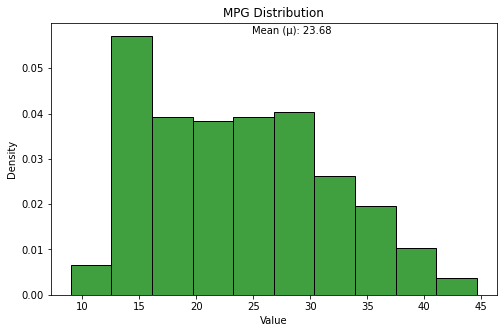

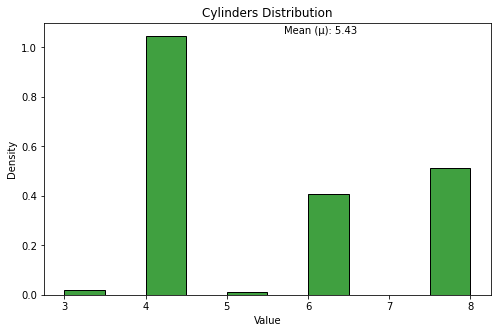

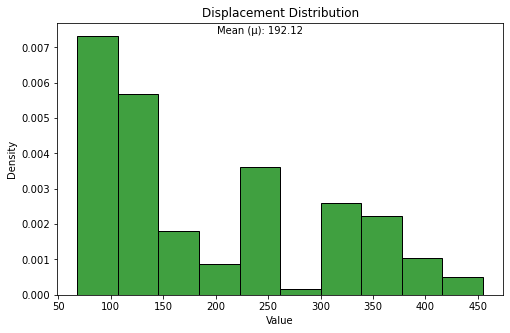

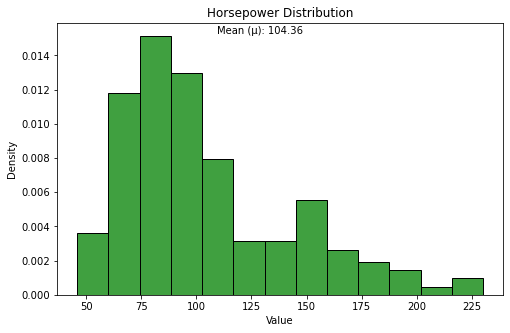

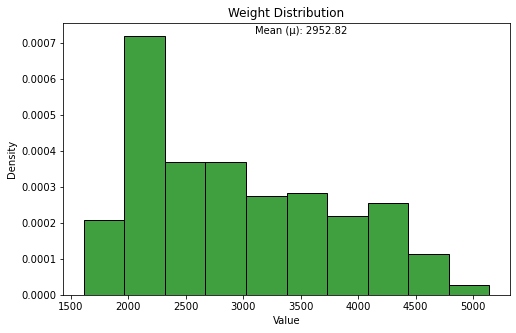

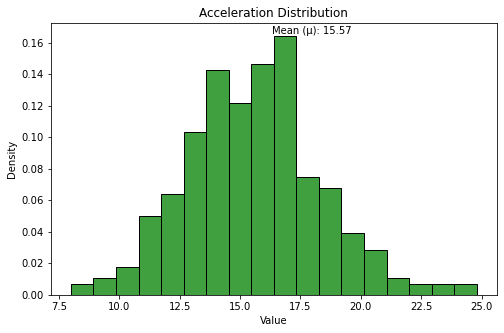

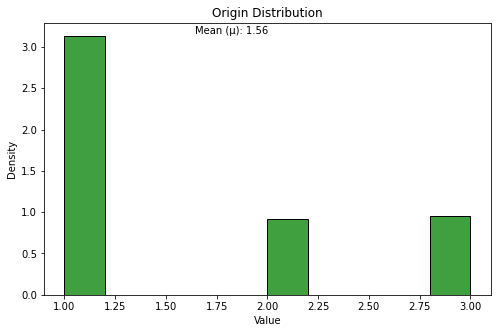

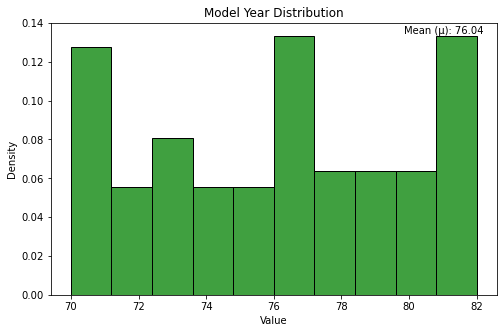

In [26]:
col= ['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Origin','Model Year']
for column in col:
    plt.figure(figsize=(8,5))
    plt.title(f'{column} Distribution')
    sns.histplot(df[column], stat='density', color='green')
    min_ylim, max_ylim = plt.ylim()
    plt.text(df[column].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column].mean()))
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

[]

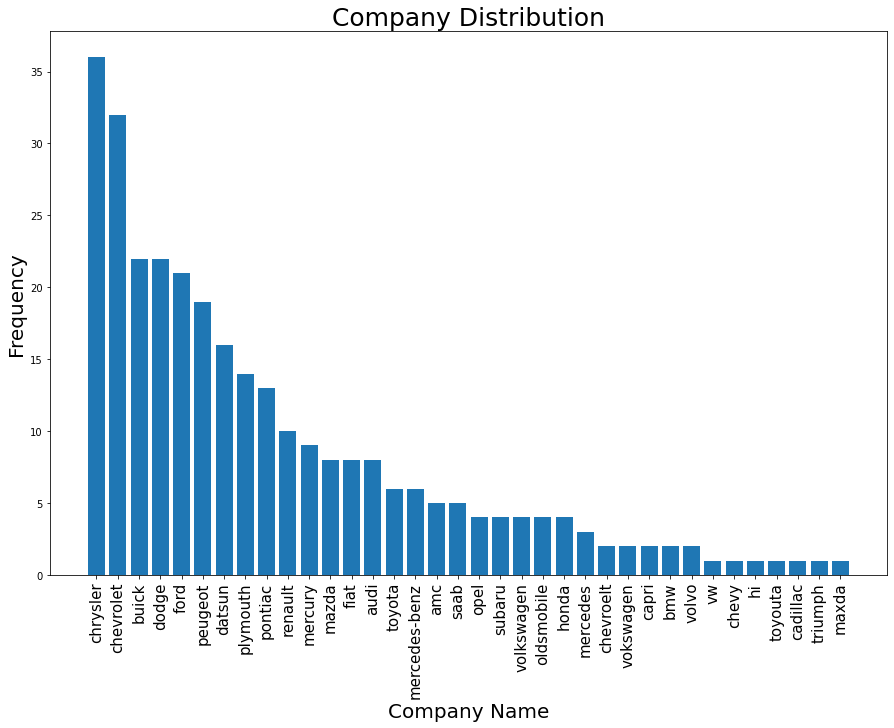

In [27]:
plt.figure(figsize=(15,10))
plt.bar(df_cats['Company'].unique(),df_cats['Company'].value_counts())
plt.title('Company Distribution', fontdict={'fontsize':25})
plt.xlabel('Company Name', fontdict={'fontsize':20})
plt.ylabel('Frequency', fontdict={'fontsize':20})
plt.xticks(rotation=90, fontsize=15)
plt.plot()

In [36]:
df_grouped= df_cats.groupby('Company')['MPG'].mean().sort_values()
df_grouped.head()

Company
hi            9.000000
chevroelt    16.000000
chrysler     17.266667
amc          18.072727
ford         19.350000
Name: MPG, dtype: float64

[]

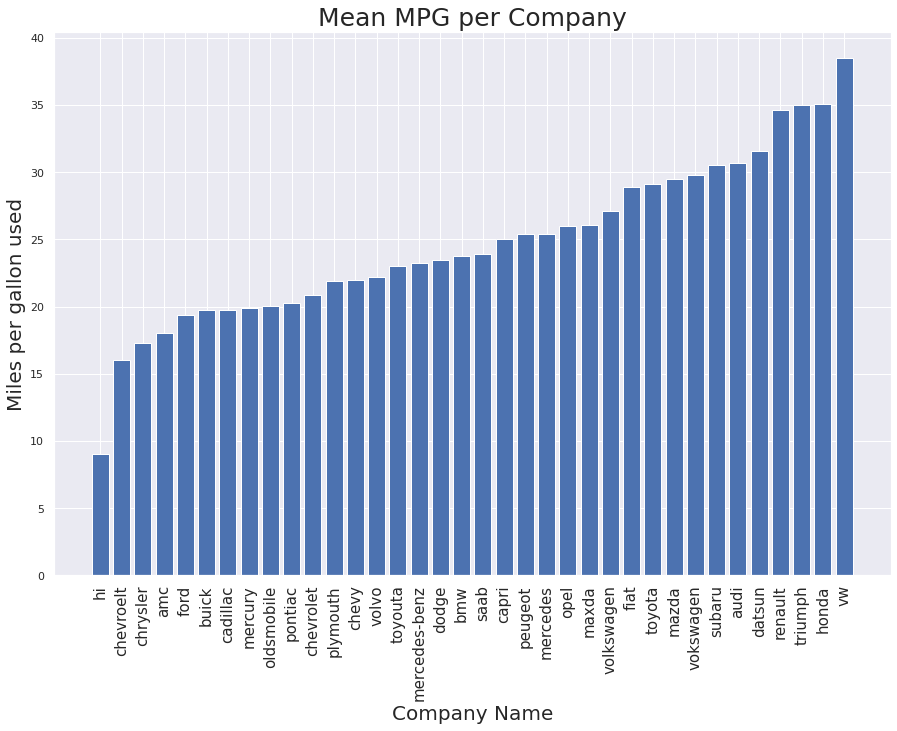

In [44]:
plt.figure(figsize=(15,10))
plt.bar(df_grouped.index, df_grouped)
plt.title('Mean MPG per Company', fontdict={'fontsize':25})
plt.xlabel('Company Name', fontdict={'fontsize':20})
plt.ylabel('Miles per gallon used', fontdict={'fontsize':20})
plt.xticks(rotation=90, fontsize=15)
plt.plot()

<Figure size 10000x10000 with 0 Axes>

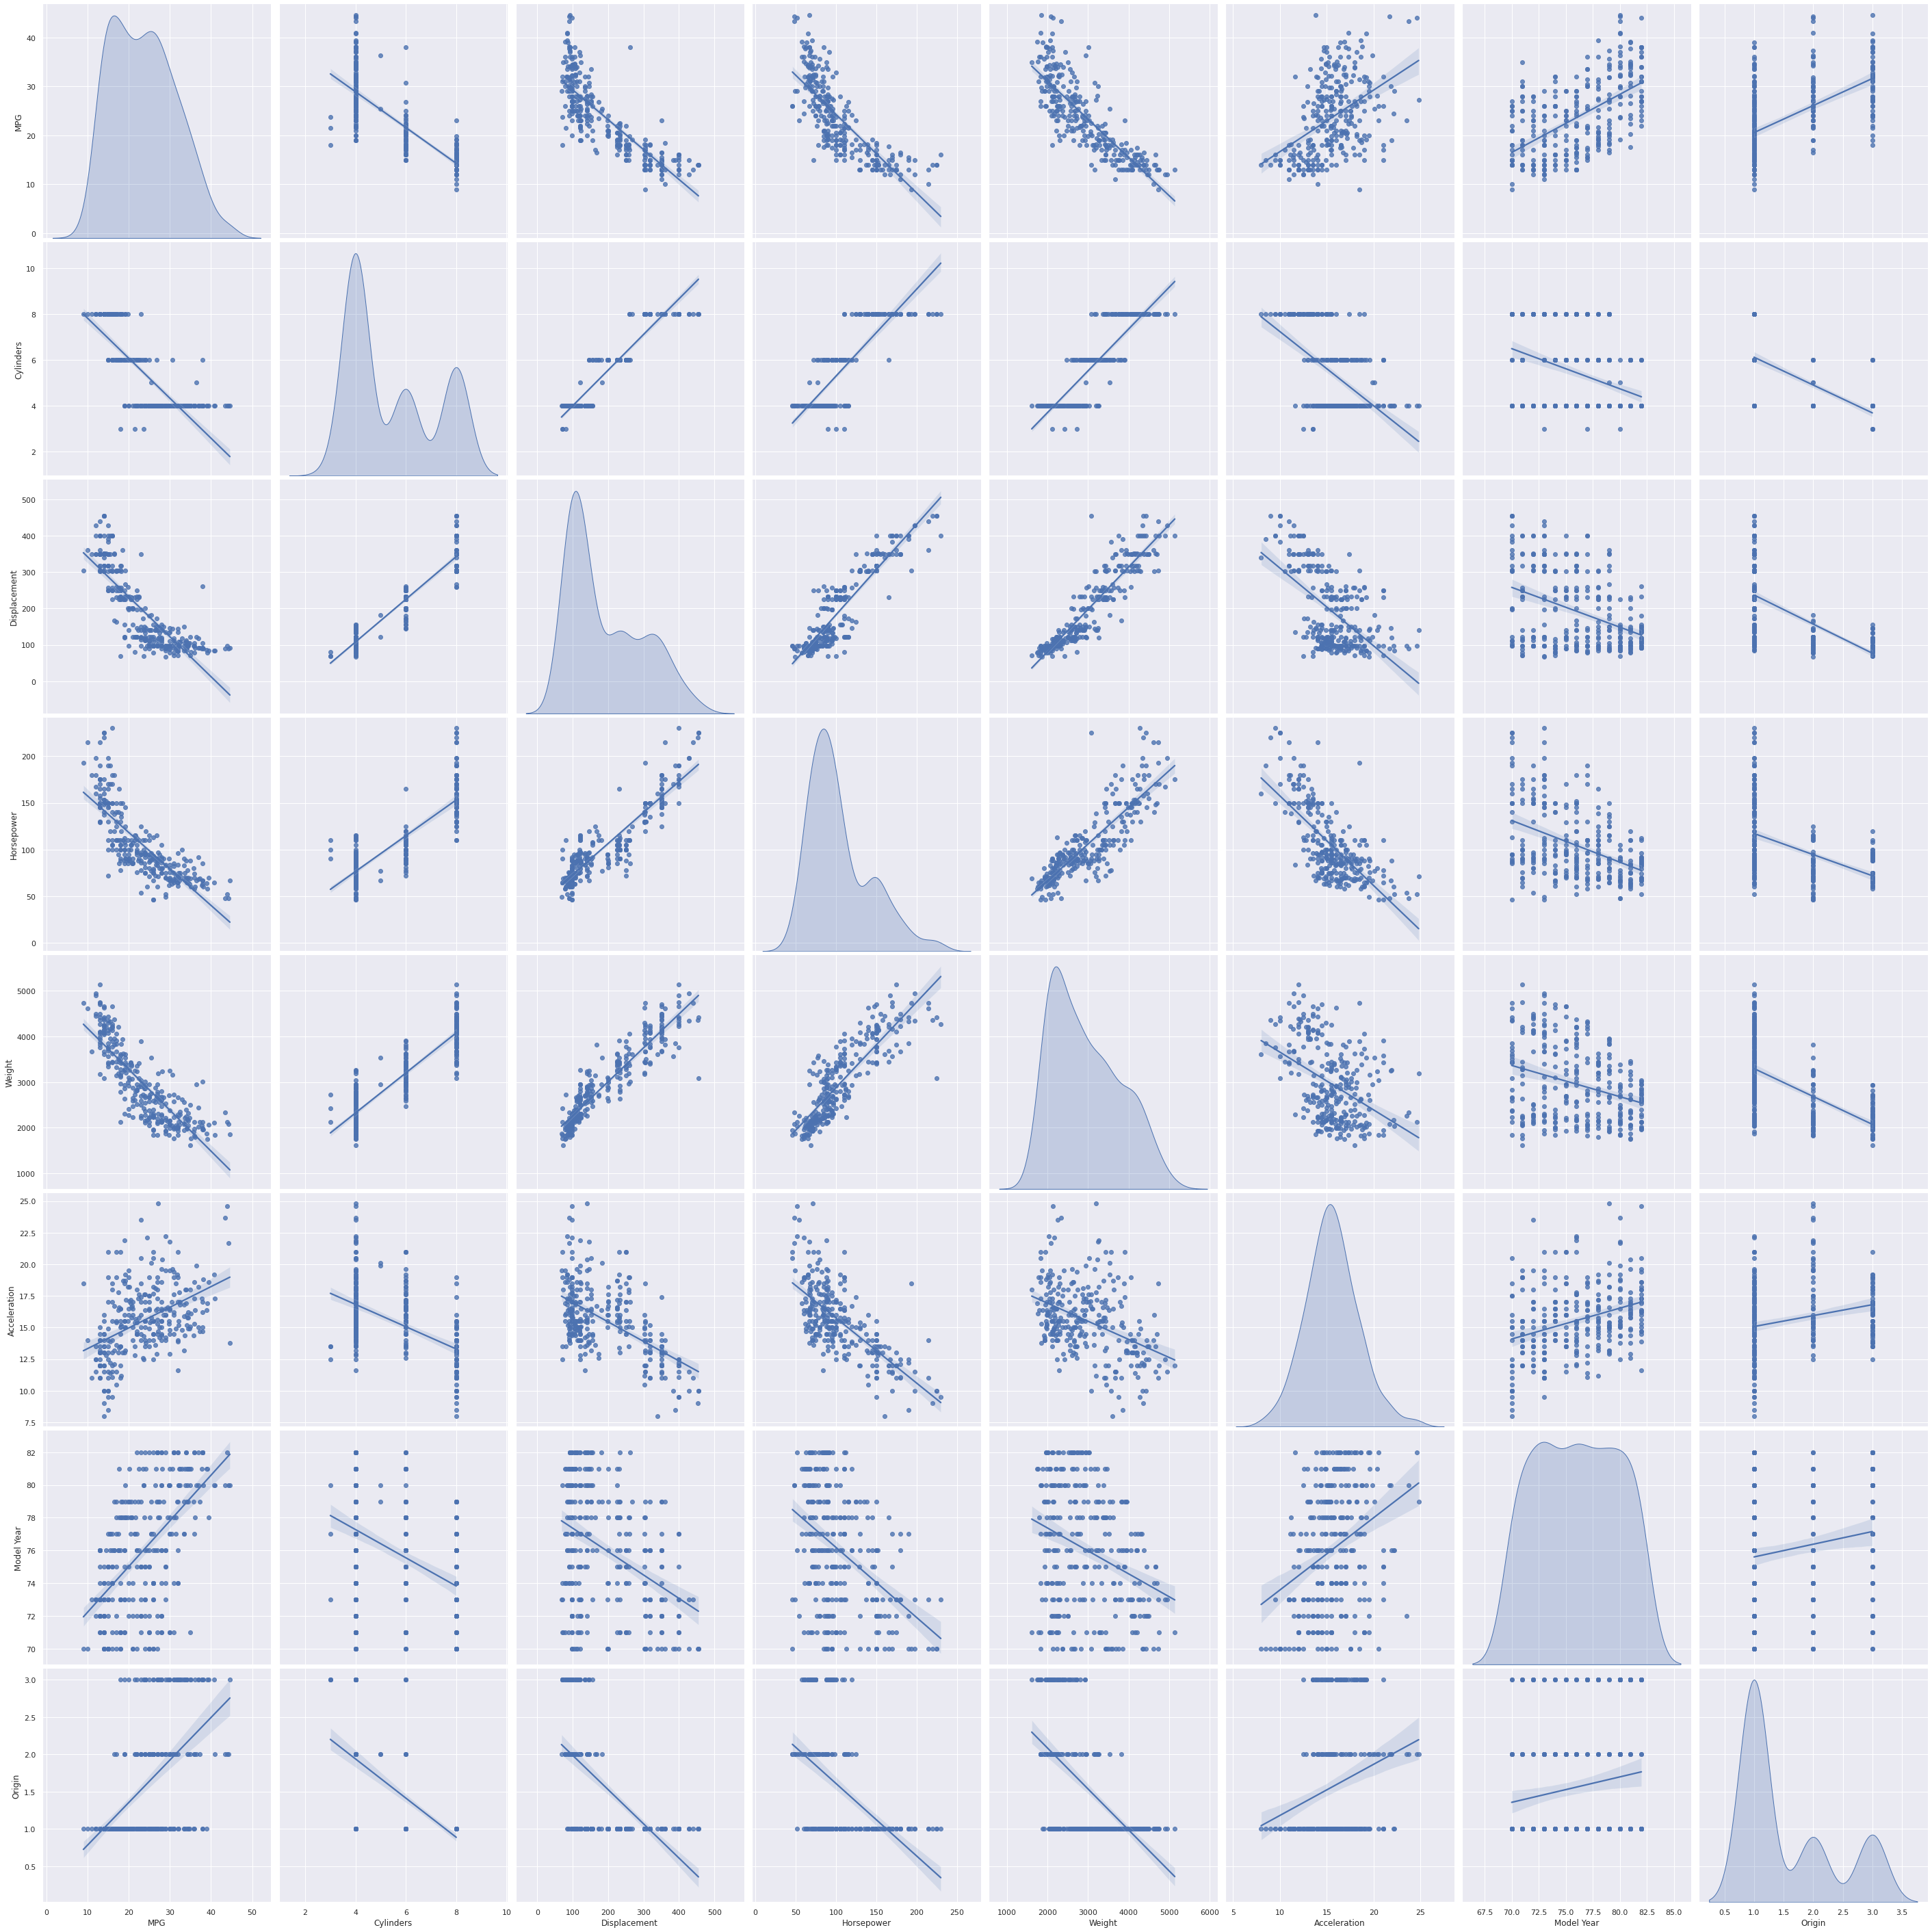

In [28]:
sns.set()
plt.figure(figsize=(20,20), dpi=500)
sns.pairplot(df,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

<AxesSubplot:>

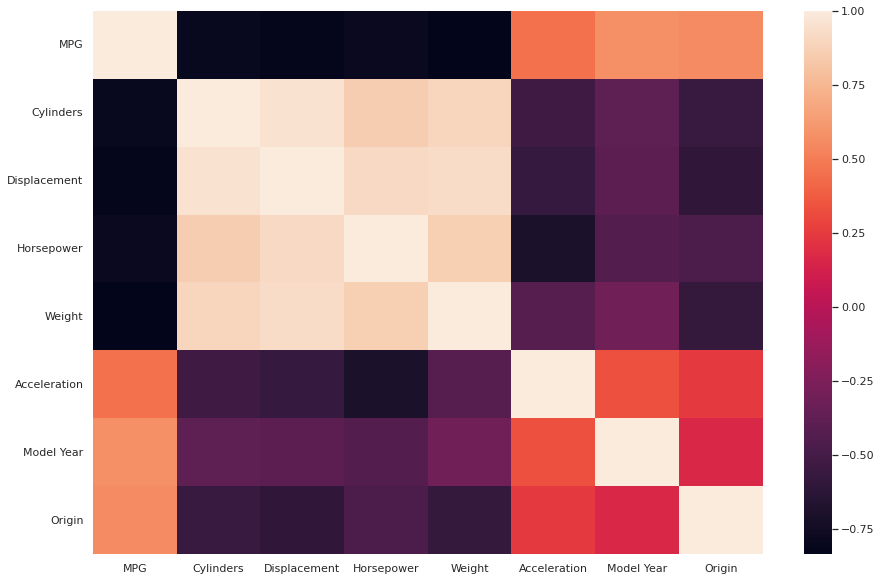

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(corel)

### Keep in mind the fact that Horsepower is highly corelated to Displacement, Cylinders and Weight.

# Splitting data

In [92]:
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

### Here, we will use MICE to impute missing values in the dataframe. We will select the columns with the highest corelation with Horspower (as seen from the heatmap) for the prediction

In [84]:
X_mice= df_vals.filter(['Horsepower', 'Cylinders', 'Displacement', 'Weight'], axis=1).copy()
imp= IterativeImputer(estimator= LinearRegression(), verbose=2, max_iter=10, tol=1e-9)
X_imputed = pd.DataFrame(imp.fit_transform(X_mice), columns=X_mice.columns)

[IterativeImputer] Completing matrix with shape (300, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Change: 38.70427909440802, scaled tolerance: 5.14e-06 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 5.14e-06 
[IterativeImputer] Early stopping criterion reached.


In [95]:
df_vals['Horsepower']= X_imputed['Horsepower']
df_cats['Horsepower']= X_imputed['Horsepower']
print(df_vals.isnull().sum(), df_cats.isnull().sum(), sep='\n'+'-'*20+'\n')

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
--------------------
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Company         0
dtype: int64


In [98]:
X1= df_cats.drop(columns=['MPG'])
y= df_cats['MPG']
X1train, X1test, y1train, y1test= train_test_split(X1, y, test_size=0.2, random_state=32)
X1.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Company
0,8,400.0,190.0,4422,12.5,72,1,chrysler
1,8,350.0,145.0,3988,13.0,73,1,chevrolet
2,8,350.0,170.0,4165,11.4,77,1,chevrolet
3,6,231.0,110.0,3907,21.0,75,1,buick
4,8,318.0,150.0,3755,14.0,76,1,dodge


In [99]:
X2= df_vals.drop(columns=['MPG'])
X2train, X2test, y2train, y2test= train_test_split(X2, y, test_size=0.2, random_state=32)
X2.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,400.0,190.0,4422,12.5,72,1
1,8,350.0,145.0,3988,13.0,73,1
2,8,350.0,170.0,4165,11.4,77,1
3,6,231.0,110.0,3907,21.0,75,1
4,8,318.0,150.0,3755,14.0,76,1


# Building models

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Before we build our models, let us first get a general understanding of what a poor model would look like through a baseline

In [103]:
poor_preds= [y.mean()]*len(y)
print(f'model: Naive Model')
print(f'RMSE: {mean_squared_error(y,poor_preds)}')
print(f'MAE: {mean_absolute_error(y,poor_preds)}')

model: Naive Model
RMSE: 60.68723955555554
MAE: 6.550253333333333


### Now, first we'll start with the categorical dataset

In [112]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor(), Ridge()]
mse1= {}
mae1= {}
for m in models:
    pipe= make_pipeline(OneHotEncoder(use_cat_names=True), m)
    pipe.fit(X1train, y1train)
    y_pred = pipe.predict(X1test)

    print(f'model: {str(m)}')
    print(f'MSE: {mean_squared_error(y1test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y1test, y_pred)}')
    print('-'*35, '\n')
    mse1[str(m)]= mean_squared_error(y1test,y_pred)
    mae1[str(m)]= mean_absolute_error(y1test,y_pred)

model: RandomForestRegressor()
MSE: 6.888144850000007
MAE: 1.887016666666668
----------------------------------- 

model: LinearRegression()
MSE: 11.381699687321884
MAE: 2.609552199539068
----------------------------------- 

model: ElasticNet()
MSE: 13.22960140438359
MAE: 2.760773780053258
----------------------------------- 

model: KNeighborsRegressor()
MSE: 18.27230666666667
MAE: 3.1039999999999996
----------------------------------- 

model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n

### As we can see, Random Forest model seem to have performed the best performing far better than any other model and XGB coming in at second place (probably because we didn't fine tune the hyperparameters)

### Now moving on to non-categorical datasets

In [117]:
mse2= {}
mae2= {}
for m in models:
    m.fit(X2train, y2train)
    y_pred = m.predict(X2test)

    print(f'model: {str(m)}')
    print(f'MSE: {mean_squared_error(y2test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y2test, y_pred)}')
    print('-'*35, '\n')
    mse2[str(m)]= mean_squared_error(y2test,y_pred)
    mae2[str(m)]= mean_absolute_error(y2test,y_pred)

model: RandomForestRegressor()
MSE: 6.707389433333334
MAE: 1.8590666666666673
----------------------------------- 

model: LinearRegression()
MSE: 11.304930228683094
MAE: 2.4599452302900913
----------------------------------- 

model: ElasticNet()
MSE: 13.22960140438359
MAE: 2.760773780053258
----------------------------------- 

model: KNeighborsRegressor()
MSE: 18.313506666666672
MAE: 3.1073333333333335
----------------------------------- 

model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()'

### Again, RF seems to have performed the best, while XGB comes in at second.

In [118]:
for m in models:
    print(f'model: {str(m)}')
    print(f'Cat - Val MSE = {mse1[str(m)]-mse2[str(m)]}')
    print(f'Cat - Val MAE = {mae1[str(m)]-mae2[str(m)]}')
    print('-'*35, '\n')

model: RandomForestRegressor()
Cat - Val MSE = 0.18075541666667316
Cat - Val MAE = 0.027950000000000585
----------------------------------- 

model: LinearRegression()
Cat - Val MSE = 0.0767694586387897
Cat - Val MAE = 0.14960696924897654
----------------------------------- 

model: ElasticNet()
Cat - Val MSE = 0.0
Cat - Val MAE = 0.0
----------------------------------- 

model: KNeighborsRegressor()
Cat - Val MSE = -0.041200000000003456
Cat - Val MAE = -0.0033333333333338544
----------------------------------- 

model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0,

### It seem that the categorial and value models perform with almost similar accuracy